In [1]:
import time
import timeit
import numpy as np

from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [2]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [3]:
def mgc(X, Y):
    mgc = MGC(X, Y, None)
    # mgc_statistic, independence_test_metadata = mgc.test_statistic()
    p_value, metadata = mgc.p_value()  # p-value call has mgc.test_statistic() call

In [4]:
print("Linear data (varying num_samples)\n")
print("num_samples", "time_taken(in secs)")
num_samples_range = range(10, 151, 10)
linear_data = list()
for num_samples in num_samples_range:
    X, Y = sims.linear_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print(num_samples, time_taken)
    linear_data.append((num_samples, time_taken))
print()
print(linear_data)

Linear data (varying num_samples)

num_samples time_taken(in secs)
10 1.608677912998246
20 4.2129362279956695
30 7.686761507997289
40 12.876448855007766
50 18.506279226989136
60 25.949373679992277
70 35.11981585698959
80 45.42150989199581
90 56.92882612199173
100 68.8296152260009
110 81.11614266000106
120 95.62930164599675
130 120.72968827899604
140 143.58189809900068
150 169.66059989499627

[(10, 1.608677912998246), (20, 4.2129362279956695), (30, 7.686761507997289), (40, 12.876448855007766), (50, 18.506279226989136), (60, 25.949373679992277), (70, 35.11981585698959), (80, 45.42150989199581), (90, 56.92882612199173), (100, 68.8296152260009), (110, 81.11614266000106), (120, 95.62930164599675), (130, 120.72968827899604), (140, 143.58189809900068), (150, 169.66059989499627)]


In [6]:
# R code for benchmarking R MGC (r_performance.R)
# require("mgc")
# require("microbenchmark")

# print("Linear data (varying num_samples)")
# print("num_samples time_taken(in secs)")

# num_samples_range = seq(10, 150, by=10)
# linear_data <- list()
# i <- 1
# for (num_samples in num_samples_range){
#   data <- mgc.sims.linear(num_samples, 1, eps=0.1)
  
#   #start_time <- Sys.time()
#   #mgc.test(data$X, data$Y)
#   #end_time <- Sys.time()
  
#   #time_taken <- end_time - start_time
#   #time_taken <- as.numeric(time_taken, units = "secs")
  
#   time_taken <- microbenchmark(mgc.test(data$X, data$Y), times=5, unit="secs") # best of 5 executions
  
#   print(num_samples)
#   print(time_taken[1, 2]/(10^9))
#   linear_data <- c(linear_data, list("num_samples"=num_samples, "time_taken"=time_taken[1, 2]/(10^9)))
#   i <- i + 1
# }

# print(linear_data)

# Performace Data
# [1] 10
# [1] 1.225284
# [1] 20
# [1] 3.336518
# [1] 30
# [1] 6.566329
# [1] 40
# [1] 11.25737
# [1] 50
# [1] 16.9009
# [1] 60
# [1] 23.86574
# [1] 70
# [1] 34.10607
# [1] 80
# [1] 42.56408
# [1] 90
# [1] 61.35755
# [1] 100
# [1] 71.12478
# [1] 110
# [1] 92.81968
# [1] 120
# [1] 99.42997
# [1] 130
# [1] 120.6133
# [1] 140
# [1] 131.1176
# [1] 150
# [1] 159.2373

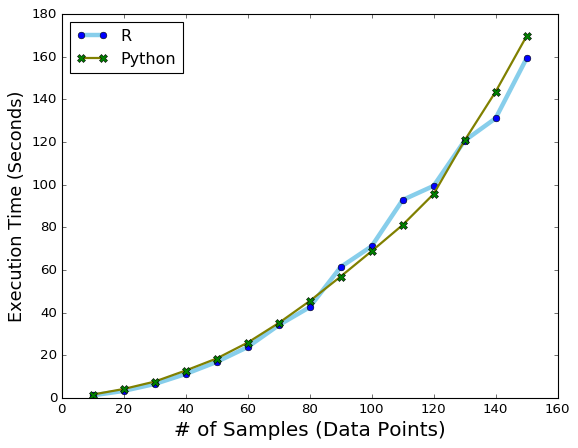

In [21]:
import matplotlib.pyplot as plt; plt.style.use('classic')
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'

num_samples = range(10, 151, 10)
r_perf_times = [1.225284, 3.336518, 6.566329, 11.25737, 16.9009, 23.86574, 34.10607, 42.56408, 61.35755, 71.12478, 92.81968, 99.42997, 120.6133, 131.1176, 159.2373]
# python_perf_times = [1.608677912998246, 4.2129362279956695, 7.686761507997289, 12.876448855007766, 18.506279226989136, 25.949373679992277, 35.11981585698959, 45.42150989199581, 56.92882612199173, 68.8296152260009, 81.11614266000106, 95.62930164599675, 120.72968827899604, 143.58189809900068, 169.66059989499627]
python_perf_times = [j for i, j in linear_data]


plt.plot(num_samples, r_perf_times, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4, label="R")
plt.plot(num_samples, python_perf_times, marker='X', markerfacecolor='green', markersize=8, color='olive', linewidth=2, label="Python")
plt.xlabel('# of Samples (Data Points)', fontsize=18)
plt.ylabel('Execution Time (Seconds)', fontsize=16)
plt.legend()

In [4]:
print("Linear data (varying num_dimensions)\n")
print("num_dims", "time_taken(in secs)")
num_dims_range = range(100, 1001, 100)
linear_data_dims = list()
for num_dims in num_dims_range:
    X, Y = sims.linear_sim(num_samp=10, num_dim=num_dims, noise=0.1)

    start = time.time()
    mgc(X, Y)
    end = time.time()
    time_taken = end - start

    print(num_dims, time_taken)
    linear_data_dims.append((num_dims, time_taken))
print()
print(linear_data_dims)

Linear data (varying num_dimensions)

num_dims time_taken(in secs)
100 1.7503888607025146
200 1.8124158382415771
300 1.7693970203399658
400 1.7731692790985107
500 1.7331271171569824
600 1.756181001663208
700 1.7862157821655273
800 1.7733182907104492
900 1.943345069885254
1000 1.9067211151123047

[(100, 1.7503888607025146), (200, 1.8124158382415771), (300, 1.7693970203399658), (400, 1.7731692790985107), (500, 1.7331271171569824), (600, 1.756181001663208), (700, 1.7862157821655273), (800, 1.7733182907104492), (900, 1.943345069885254), (1000, 1.9067211151123047)]


In [5]:
print("Non-linear (spiral) data (varying num_samples)")
print("num_samples", "time_taken(in secs)")
num_samples_range = range(10, 151, 10)
spiral_data = list()
for num_samples in num_samples_range:
    X, Y = sims.spiral_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print(num_samples, time_taken)
    spiral_data.append((num_samples, time_taken))
print()
print(spiral_data)

Non-linear (spiral) data (varying num_samples)
num_samples time_taken(in secs)
10 1.694843507008045
20 4.094474583005649
30 8.004368509995402
40 12.543217623999226
50 20.50277219399868
60 27.801608312001918
70 38.17759534600191
80 49.26210815898958
90 57.71468586700212
100 71.90501145200687


KeyboardInterrupt: 